# DATASCI 207: Data cleaning notebook

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from datetime import datetime

from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/steam-games.csv')

Mounted at /content/gdrive


In [2]:
pd.set_option('display.max_columns', None)
df.head(10)

,app_id,title,release_date,genres,categories,developer,publisher,original_price,discount_percentage,discounted_price,dlc_available,age_rating,content_descriptor,about_description,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,recent_review,recent_review_%,recent_review_count
0,730,Counter-Strike 2,"21 Aug, 2012","Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,NaN,NaN,Free,1,0,NaN,"For over two decades, Counter-Strike has offer...",True,False,True,1,Very Positive,87.0,8062218.0,Mostly Positive,79.0,57466.0
1,570,Dota 2,"9 Jul, 2013","Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,NaN,NaN,Free,2,0,NaN,"Every day, millions of players worldwide enter...",True,True,True,0,Very Positive,81.0,2243112.0,Mostly Positive,72.0,23395.0
2,2215430,Ghost of Tsushima DIRECTOR'S CUT,"16 May, 2024","Action, Adventure","Single-player, Online Co-op, Steam Achievement...",Sucker Punch Productions,PlayStation PC LLC,NaN,NaN,"₹3,999.00",0,1,Violence,A storm is coming. Venture into the complete G...,True,False,False,0,Very Positive,89.0,12294.0,NaN,NaN,NaN
3,1245620,ELDEN RING,"24 Feb, 2022","Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,NaN,NaN,"₹3,599.00",2,1,Violence,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",True,False,False,6,Very Positive,93.0,605191.0,Very Positive,94.0,7837.0
4,1085660,Destiny 2,"1 Oct, 2019","Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,NaN,NaN,Free,14,1,"Violence, In game purchases",Destiny 2 is an action MMO with a single evolv...,True,False,False,0,Very Positive,80.0,594713.0,Mostly Positive,73.0,4845.0
5,1091500,Cyberpunk 2077,"9 Dec, 2020",RPG,"Single-player, Steam Achievements, Steam Tradi...",CD PROJEKT RED,CD PROJEKT RED,"₹2,999.00",-50%,"₹1,499.00",3,1,"Violence, Sex, Bad Language","Cyberpunk 2077 is an open-world, action-advent...",True,False,False,4,Very Positive,83.0,654304.0,Very Positive,94.0,7771.0
6,1086940,Baldur's Gate 3,"3 Aug, 2023","Adventure, RPG, Strategy","Single-player, Online Co-op, LAN Co-op, Steam ...",Larian Studios,Larian Studios,NaN,NaN,"₹2,999.00",1,1,"Violence, Bad Language, Sex","Baldur’s Gate 3 is a story-rich, party-based R...",True,True,False,2,Overwhelmingly Positive,96.0,543077.0,Overwhelmingly Positive,96.0,9642.0
7,578080,PUBG: BATTLEGROUNDS,"21 Dec, 2017","Action, Adventure, Massively Multiplayer, Free...","Online PvP, Stats, Remote Play on Phone, Remot...","KRAFTON, Inc.","KRAFTON, Inc.",NaN,NaN,Free,0,0,NaN,Play PUBG: BATTLEGROUNDS for free. Land on str...,True,False,False,1,Mixed,58.0,2361734.0,Mixed,68.0,19214.0
8,1172470,Apex Legends™,"4 Nov, 2020","Action, Adventure, Free to Play","Online PvP, Online Co-op, Steam Achievements, ...",Respawn,Electronic Arts,NaN,NaN,Free,0,1,"Violence, In-Game Purchases","Apex Legends is the award-winning, free-to-pla...",True,False,False,2,Mostly Positive,77.0,828477.0,Mixed,60.0,11524.0
9,1142710,Total War: WARHAMMER III,"16 Feb, 2022","Action, Strategy","Single-player, Online PvP, LAN PvP, Online Co-...",CREATIVE ASSEMBLY,SEGA,"₹4,499.00",-50%,"₹2,249.00",23,1,Violence,The cataclysmic conclusion to the Total War: W...,True,True,True,0,Mixed,65.0,70065.0,Very Positive,86.0,1593.0


In [3]:
df.columns

Index(['app_id', 'title', 'release_date', 'genres', 'categories', 'developer',
       'publisher', 'original_price', 'discount_percentage',
       'discounted_price', 'dlc_available', 'age_rating', 'content_descriptor',
       'about_description', 'win_support', 'mac_support', 'linux_support',
       'awards', 'overall_review', 'overall_review_%', 'overall_review_count',
       'recent_review', 'recent_review_%', 'recent_review_count'],
      dtype='object')

In [4]:
df.dtypes

,0
app_id,int64
title,object
release_date,object
genres,object
categories,object
developer,object
publisher,object
original_price,object
discount_percentage,object
discounted_price,object


In [ ]:
df.shape

(42497, 24)

Observations:

* There are 42,497 rows and 24 columns.  
* There are different genres in for each game, which need to be split into separate columns, similarly for categories.
*   Prices are in rupees, Free values need to be converted to 0.



In [ ]:
#Calculate the proportion of null values in each column
missing = df.isnull().sum()
missing = missing[missing > 0]
missing_percentage = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percentage})
missing_df

,Missing Values,Percentage
release_date,57,0.134127
genres,87,0.204720
categories,45,0.105890
developer,190,0.447090
publisher,211,0.496506
original_price,37638,88.566252
discount_percentage,37638,88.566252
discounted_price,240,0.564746
content_descriptor,40122,94.411370
about_description,138,0.324729


Observations
* Based on the percentage of null values in the dataset, we won't use the following columns which are mostly null: original_price, discount_percentage, content_descriptor, recent_review columns. App ID and title will also not be used as features.

<ipython-input-10-736db4bba916>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='overall_review', y='awards', data=df, palette='husl')


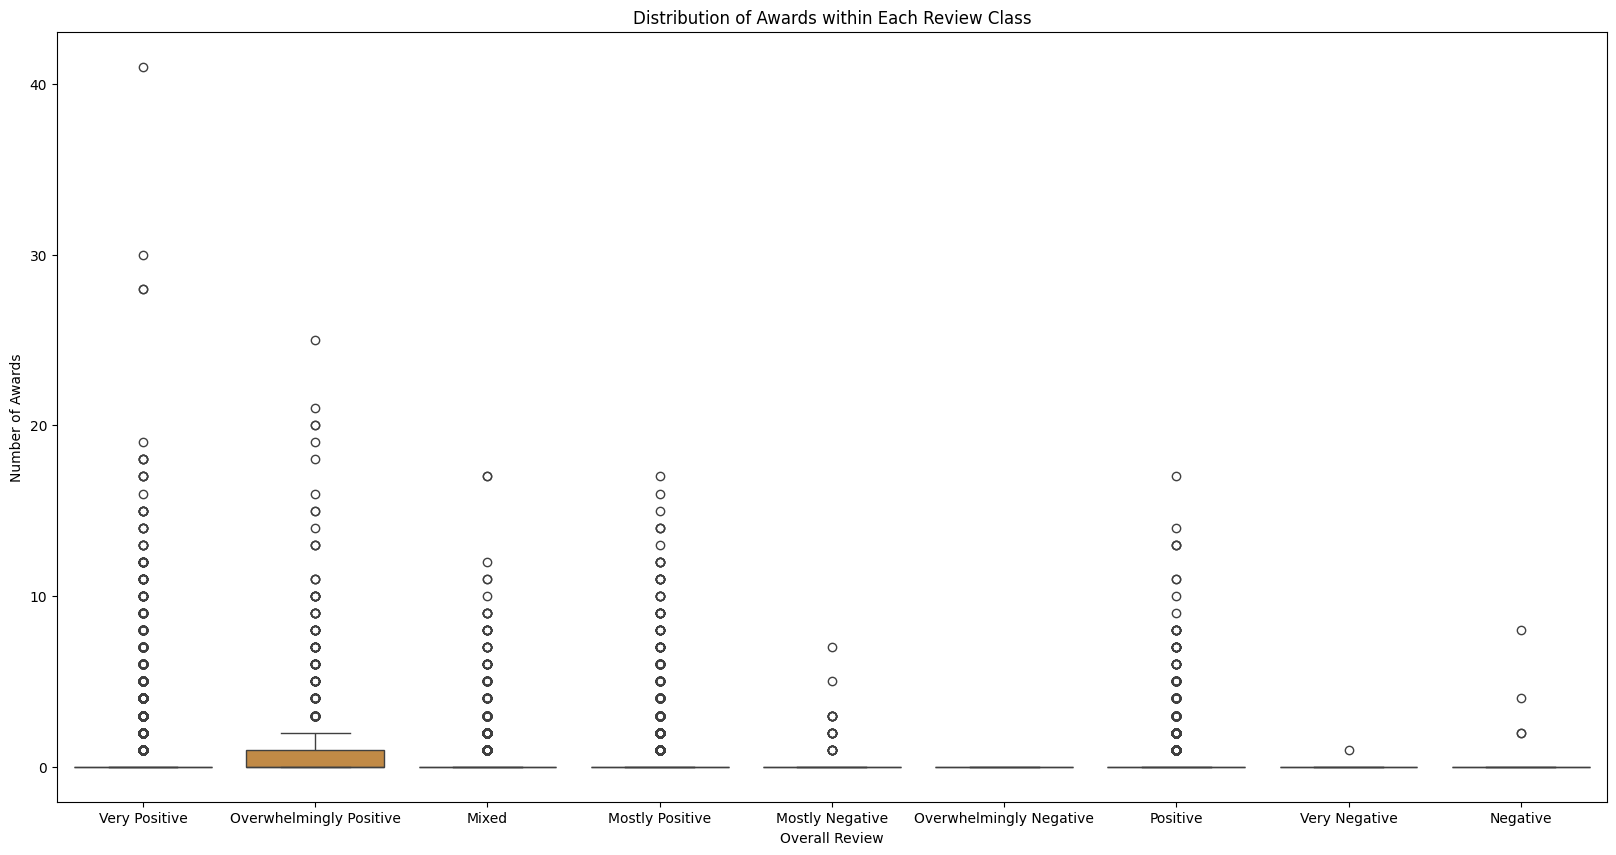

In [ ]:
# Plotting
plt.figure(figsize=(20, 10))
sns.boxplot(x='overall_review', y='awards', data=df, palette='husl')
plt.xlabel('Overall Review')
plt.ylabel('Number of Awards')
plt.title('Distribution of Awards within Each Review Class')
plt.show()

It's clear that reviews that are overwhelmingly positive and very positive have a high number of awards received.

Publisher and developer

In [ ]:
# Check for equality between publisher and developer
df['same_publisher_developer'] = df['developer'] == df['publisher']
# Count the number of games where publisher and developer are the same
same_count = df['same_publisher_developer'].sum()

# Total number of games
total_games = df.shape[0]

# Percentage of games where publisher and developer are the same
percentage_same = (same_count / total_games) * 100

print(f'Total number of games: {total_games}')
print(f'Number of games where publisher and developer are the same: {same_count}')
print(f'Percentage of games with the same publisher and developer: {percentage_same:.2f}%')

Total number of games: 42497
Number of games where publisher and developer are the same: 28112
Percentage of games with the same publisher and developer: 66.15%


In [5]:
print(df['developer'].nunique())
print(df['publisher'].nunique())

25126
20986


The data was scraped on 9th, May 2024. Print the games that have release dates post this date.

Invalid dates such as Apr 2019.

In [ ]:
print(df['win_support'].value_counts())
#since most games support windows, this feature can be dropped
print(df['linux_support'].value_counts())
#a good majority of games dont support linux, this feature can also be dropped
print(df['mac_support'].value_counts())

#check if all app_ids are unique
print(df['app_id'].is_unique)

win_support
True     41877
False        3
Name: count, dtype: int64

In [7]:
# Convert release_date to datetime, coercing errors
df['release_date'] = pd.to_datetime(df['release_date'], format='%d %b, %Y', errors='coerce')

# Calculate the age of the game
current_date = datetime.now()
df['age_of_game'] = df['release_date'].apply(lambda x: current_date.year - x.year if pd.notnull(x) else None)

# Clean discounted_price column
df['discounted_price'] = df['discounted_price'].replace('Free', '0')
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Filter the dataframe for games with release dates after the cutoff date
df[df['release_date'] > pd.to_datetime('2024-05-09')]

#remove rows
df = df[df['release_date'] <= pd.to_datetime('2024-05-09')]
df.shape

(41880, 25)

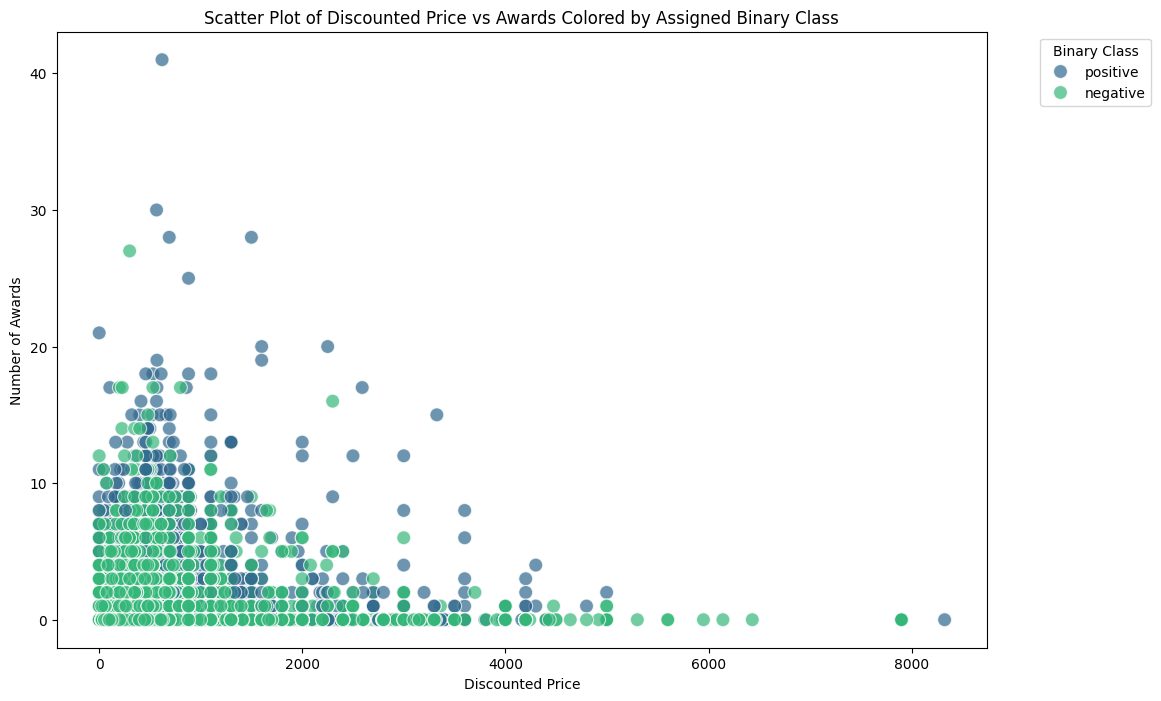

In [ ]:
# Plotting
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df.loc[df.discounted_price < 10000], x='discounted_price', y='awards', hue='binary_class', palette='viridis', s=100,alpha=0.7)

# Adding labels and title
plt.xlabel('Discounted Price')
plt.ylabel('Number of Awards')
plt.title('Scatter Plot of Discounted Price vs Awards Colored by Assigned Binary Class')

# Adding a legend
plt.legend(title='Binary Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# # Get current tick positions and labels
# current_ticks = scatter.get_xticks()
# current_labels = [item.get_text() for item in scatter.get_xticklabels()]

# # Reduce number of ticks by selecting every nth tick
# n = 5  # Adjust n to reduce the number of ticks
# reduced_ticks = current_ticks[::n]
# reduced_labels = current_labels[::n]

# # Set new tick positions and labels
# scatter.set_xticks(reduced_ticks)
# scatter.set_xticklabels(reduced_labels)

plt.show()

This plot is abbreviated to prices less than 10,000.

Price Distribution: The prices are skewed right, with a long tail stretching out to a couple of games priced over 5,000 to 15,000.

Awards Distribution: There is a wide range in the number of awards, from 0 up to around 40. It appears that a significant number of games have fewer awards, with some exceptions that have received many.

Unique Genres and Categories

In [ ]:
def get_unique_values(df, column):
    # Drop NaN values and split each cell by comma
    split_values = df[column].dropna().str.split(', ')
    # Flatten the list of lists
    flat_list = [item for sublist in split_values for item in sublist]
    # Get unique values
    unique_values = set(flat_list)
    return unique_values

# Get unique values in genres and categories
unique_genres = get_unique_values(df, 'genres')
unique_categories = get_unique_values(df, 'categories')

print("Unique Genres:")
print(unique_genres)
print("\nUnique Categories:")
print(unique_categories)
print(len(unique_genres))

Unique Genres:
{'Video Production', 'Adventure', 'Audio Production', 'Game Development', 'Free to Play', 'Simulation', 'Strategy', 'Indie', 'Education', 'Racing', 'Animation & Modeling', 'Sports', 'Utilities', 'Action', 'Massively Multiplayer', 'Web Publishing', 'Software Training', 'Early Access', 'RPG', 'Casual', 'Design & Illustration', 'Movie'}

Unique Categories:
{'Valve Anti-Cheat enabled', 'Online PvP', 'Steam Cloud', 'Mods (require HL2)', 'Family Sharing', 'Tracked Controller Support', 'Steam Achievements', 'Includes level editor', 'HDR available', 'Remote Play on Tablet', 'Commentary available', 'In-App Purchases', 'Steam Leaderboards', 'Online Co-op', 'Single-player', 'Shared/Split Screen PvP', 'Mods', 'Captions available', 'Shared/Split Screen Co-op', 'Remote Play on Phone', 'Downloadable Content', 'Remote Play on TV', 'Steam Turn Notifications', 'Steam Trading Cards', 'VR Only', 'Stats', 'Profile Features Limited', 'MMO', 'LAN PvP', 'Steam Workshop', 'SteamVR Collectibles',

Use Genres feature to keep the model parsimonious.

In [8]:
# Split the genres column and create one-hot encoding
genres_split = df['genres'].str.get_dummies(sep=', ')

# Merge the one-hot encoded columns back with the original DataFrame
df = pd.concat([df, genres_split], axis=1)

df.head(5)

,app_id,title,release_date,genres,categories,developer,publisher,original_price,discount_percentage,discounted_price,dlc_available,age_rating,content_descriptor,about_description,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,recent_review,recent_review_%,recent_review_count,age_of_game,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free to Play,Game Development,Indie,Massively Multiplayer,Movie,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,730,Counter-Strike 2,2012-08-21,"Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,NaN,NaN,0.0,1,0,NaN,"For over two decades, Counter-Strike has offer...",True,False,True,1,Very Positive,87.0,8062218.0,Mostly Positive,79.0,57466.0,12.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,570,Dota 2,2013-07-09,"Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,NaN,NaN,0.0,2,0,NaN,"Every day, millions of players worldwide enter...",True,True,True,0,Very Positive,81.0,2243112.0,Mostly Positive,72.0,23395.0,11.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1245620,ELDEN RING,2022-02-24,"Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,NaN,NaN,3599.0,2,1,Violence,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",True,False,False,6,Very Positive,93.0,605191.0,Very Positive,94.0,7837.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1085660,Destiny 2,2019-10-01,"Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,NaN,NaN,0.0,14,1,"Violence, In game purchases",Destiny 2 is an action MMO with a single evolv...,True,False,False,0,Very Positive,80.0,594713.0,Mostly Positive,73.0,4845.0,5.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1091500,Cyberpunk 2077,2020-12-09,RPG,"Single-player, Steam Achievements, Steam Tradi...",CD PROJEKT RED,CD PROJEKT RED,"₹2,999.00",-50%,1499.0,3,1,"Violence, Sex, Bad Language","Cyberpunk 2077 is an open-world, action-advent...",True,False,False,4,Very Positive,83.0,654304.0,Very Positive,94.0,7771.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# Final Features

# The outcome variable of interest is the overall_review class

Most reviews are positive, with very few negative reviews.

Text(0.5, 1.0, 'Distribution of overall review %')

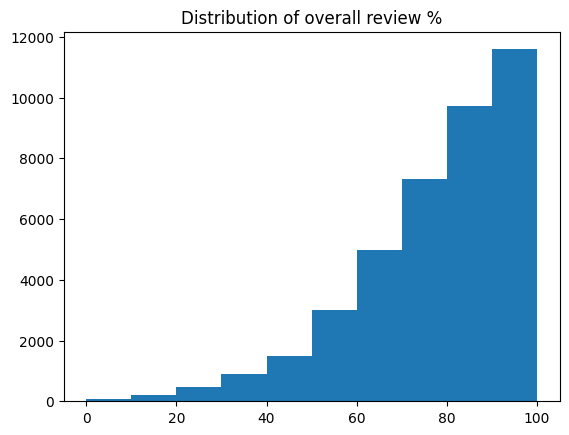

In [ ]:
plt.hist(df['overall_review_%'])
plt.title('Distribution of overall review %')

<ipython-input-87-3029d7de49a6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='overall_review', y='overall_review_%', data=df,palette=palette)
<ipython-input-87-3029d7de49a6>:4: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.boxplot(x='overall_review', y='overall_review_%', data=df,palette=palette)


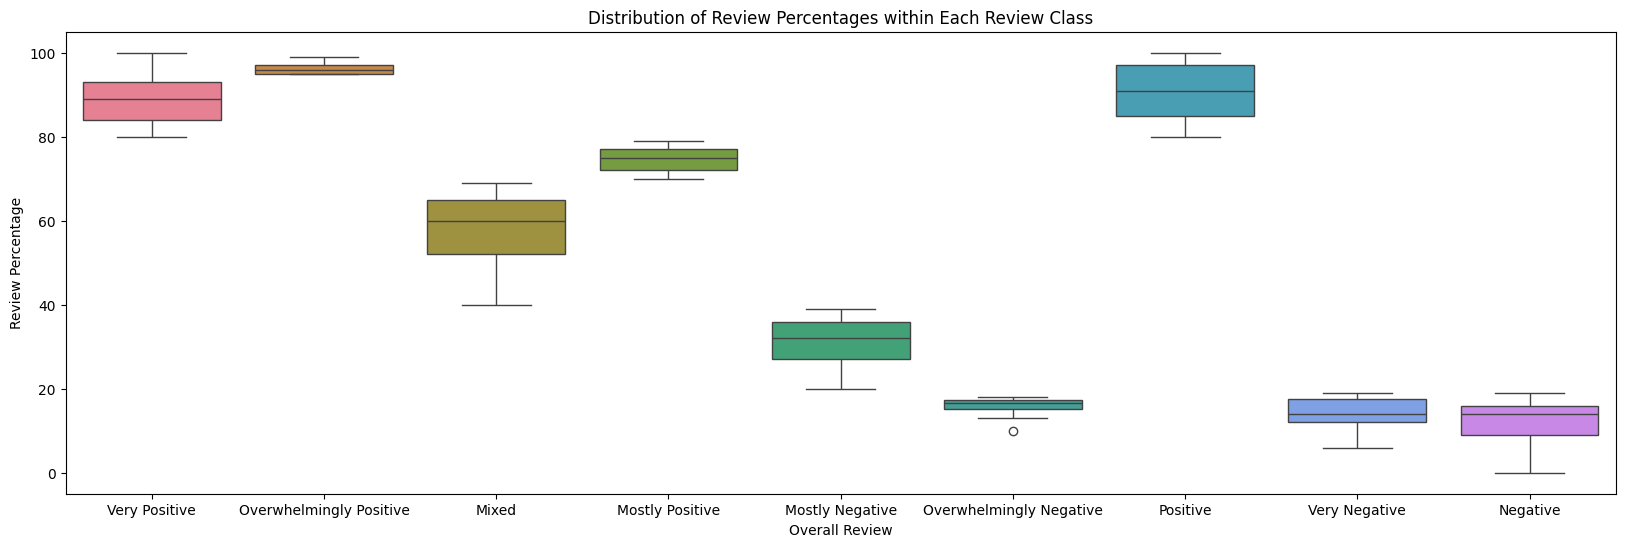

In [ ]:
# Plot the distribution of review percentages within each review class
palette = sns.color_palette("husl", len(df['overall_review'].unique()))
plt.figure(figsize=(20, 6))
sns.boxplot(x='overall_review', y='overall_review_%', data=df,palette=palette)
plt.xlabel('Overall Review')
plt.ylabel('Review Percentage')
plt.title('Distribution of Review Percentages within Each Review Class')
plt.show()

We need to check how these class imbalances can be fixed in a multiclassification problem, because there are very few negative reviews.

There are not a lot of empty rows, so let's drop them.

In [11]:
df = df.dropna()

In [ ]:
df.to_csv('gdrive/My Drive/DATASCI 207/DATASCI 207 Project/steam-games-cleaned_20240806.csv')

# KMeans Clustering

In [23]:
# import training set after clean and split
df = pd.read_csv('gdrive/My Drive/DATASCI 207/DATASCI 207 Project/train_set.csv')
df.dropna(inplace=True)

<ipython-input-23-a475bbb3584e>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('gdrive/My Drive/DATASCI 207/DATASCI 207 Project/train_set.csv')


In [24]:
random_state = 42
n_clusters = 9 # pick clusters as original number of classes

# define KMeans model
def fit_kmeans(X, n_clusters, random_state):
  kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
  model = kmeans.fit(X)
  return model

# fit KMeans model
kmeans = fit_kmeans(df[['discounted_price','awards', 'age_of_game']], n_clusters, random_state)

# get cluster predictions
pred_cluster = kmeans.predict(df[['discounted_price','awards', 'age_of_game']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [34]:
df['cluster'] = pred_cluster
df.head()

,Unnamed: 0,discounted_price,awards,age_of_game,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,...,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing,padded_text,binary_class,cluster
0,4065,-0.015185,-0.247633,1.300701,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[1250 4758 225 2638 1 1 63 131 561 ...,0.0,4
3,14881,0.385431,2.041290,-0.211143,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,[ 1 162 1 5 480 134 205 11 23 ...,0.0,5
4,19949,-0.235524,-0.247633,-1.118250,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[ 32 1306 2510 75 12 491 1 11 238 ...,0.0,0
5,18884,-0.676203,-0.247633,-0.815881,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[ 317 16 2 3319 1 0 0 0 0 ...,0.0,0
6,21669,-0.015185,-0.247633,0.695964,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,[ 942 1320 1 79 38 76 696 39 0 ...,1.0,4


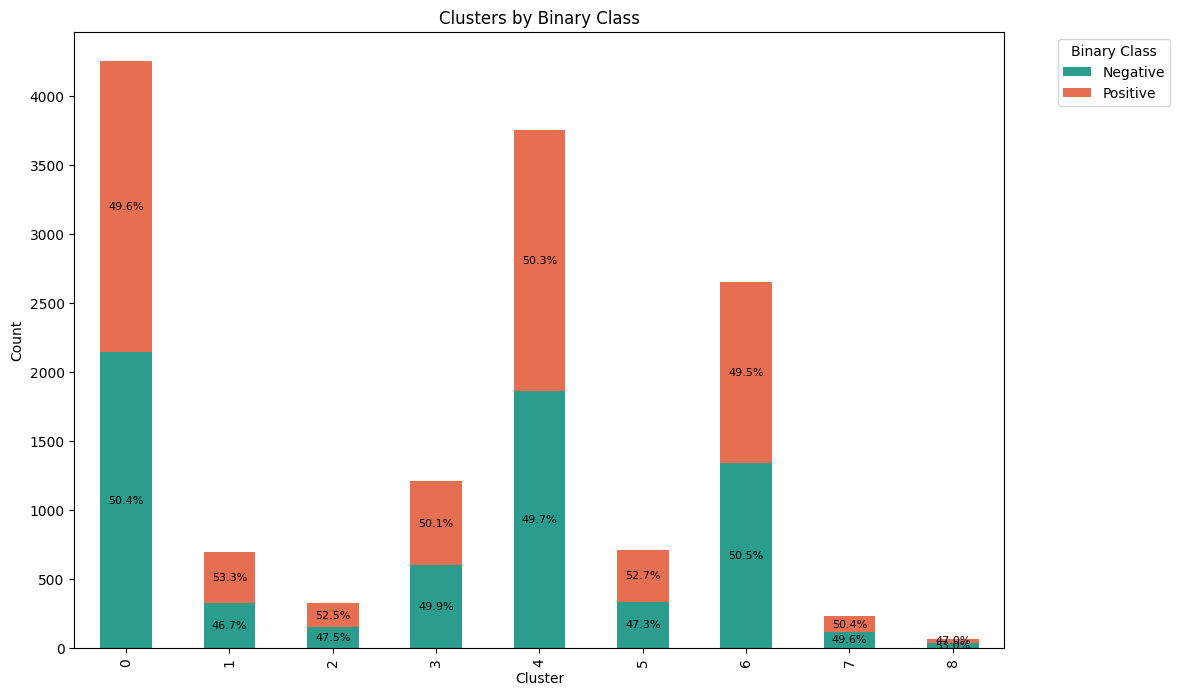

,count
cluster,
0,4256
1,698
2,322
3,1208
4,3754
5,711
6,2651
7,230
8,66


In [35]:
cluster_counts = df.groupby(['cluster', 'binary_class']).size().unstack(fill_value=0)

# Create a DataFrame with counts for each cluster and binary_class
cluster_data = cluster_counts.reset_index()
# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each binary class
colors = ['#2a9d8f', '#e76f51']  # Change these colors as needed

# Plot each binary class
cluster_data.set_index('cluster').plot(kind='bar', stacked=True, color=colors, ax=ax)

# Adding labels and title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Clusters by Binary Class')
plt.xticks(rotation=90)
# plt.yscale('log')

# Add percentage labels to the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    # Calculate total height of the stack
    total_height = sum(patch.get_height() for patch in ax.patches if patch.get_x() == x)

    # Calculate the percentage
    percentage = (height / total_height) * 100

    # Add label if percentage is greater than 10%
    if percentage > 10:
        ax.text(x + width / 2., y + height/2, f'{percentage:.1f}%',
                ha='center', va='center', fontsize=8, color='black')


# Adding legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Negative', 'Positive'], title='Binary Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()
df['cluster'].value_counts().sort_index()

We are not noticing a significant difference in ratio of negative:positive classes for each of the clusters.

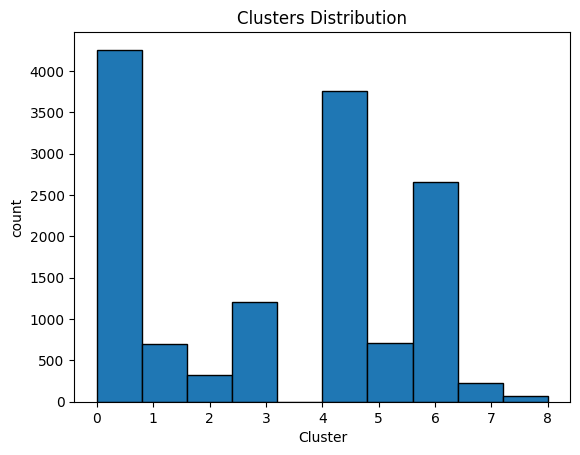

cluster
0    4256
4    3754
6    2651
3    1208
5     711
1     698
2     322
7     230
8      66
Name: count, dtype: int64


In [27]:
# dist of value counts in clusters
plt.hist(df['cluster'], bins=10, edgecolor='black')
plt.title('Clusters Distribution')
plt.xlabel('Cluster')
plt.ylabel('count')
plt.show()
print(df['cluster'].value_counts())

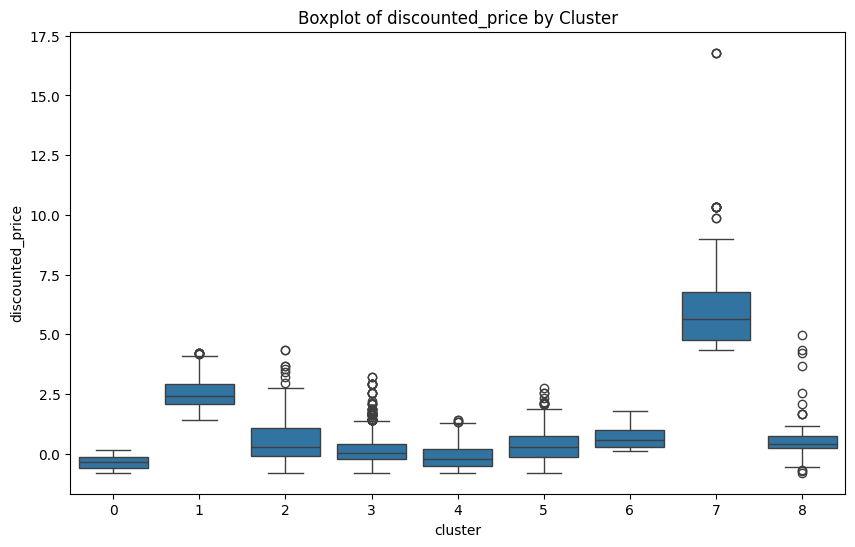

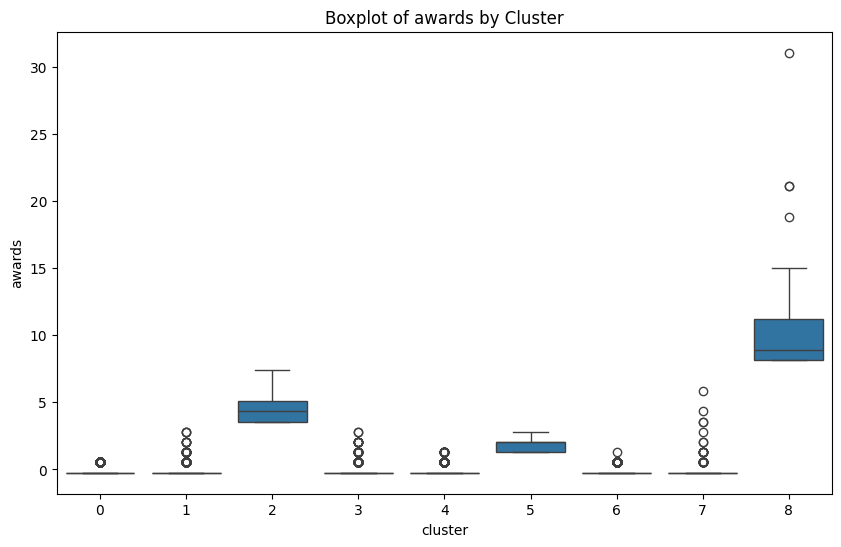

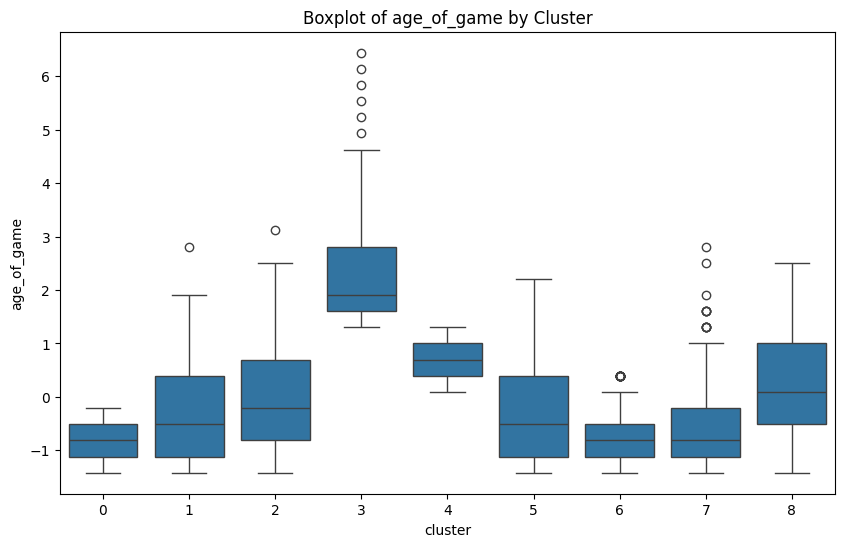

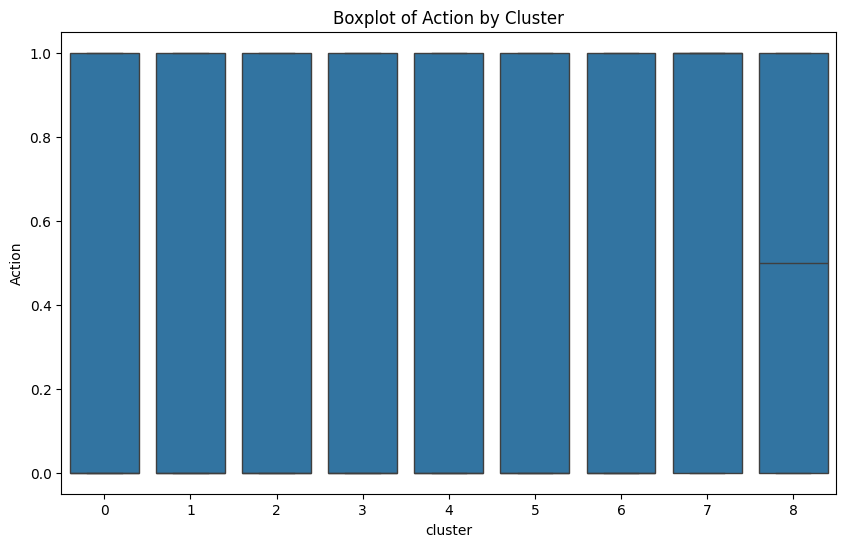

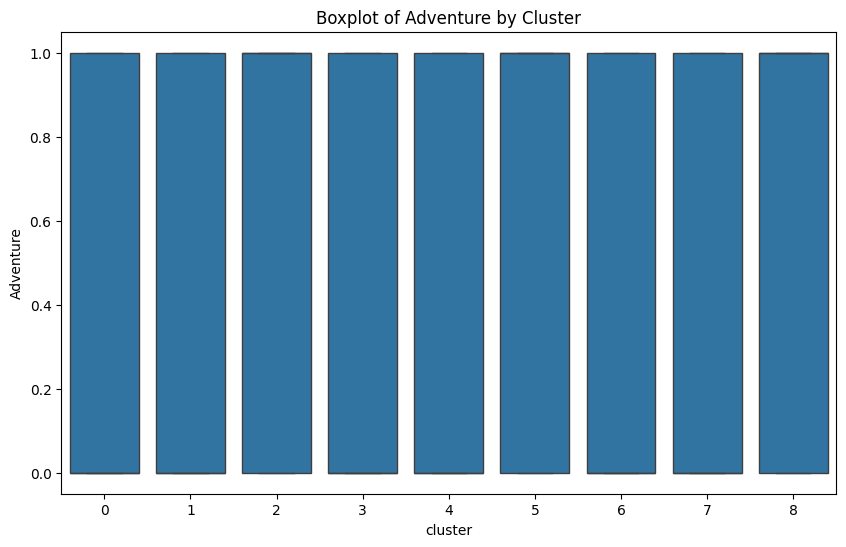

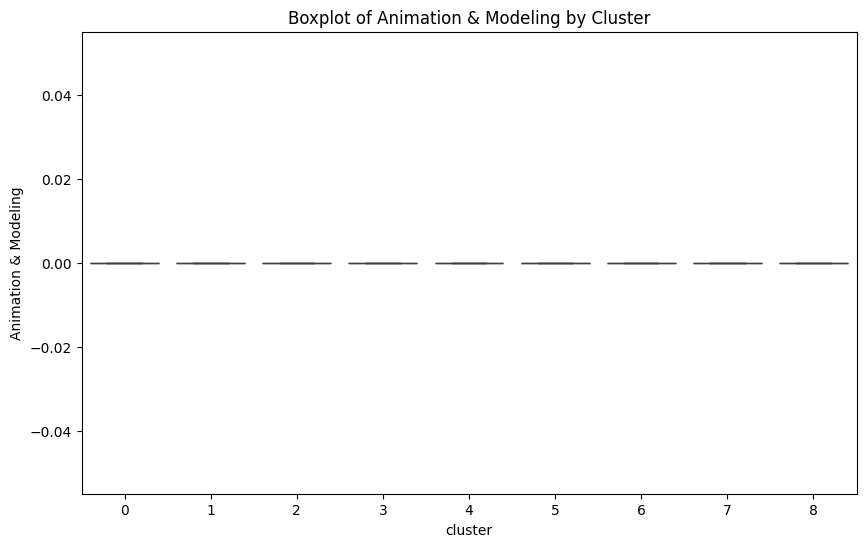

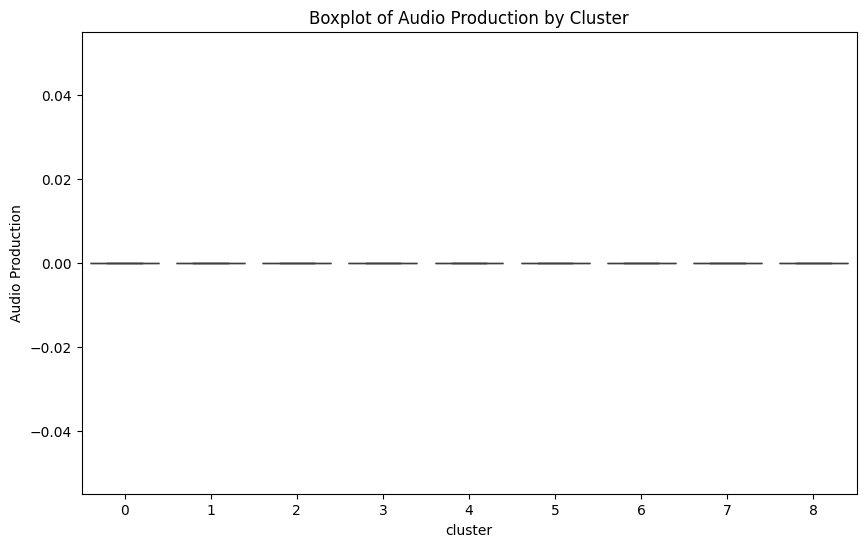

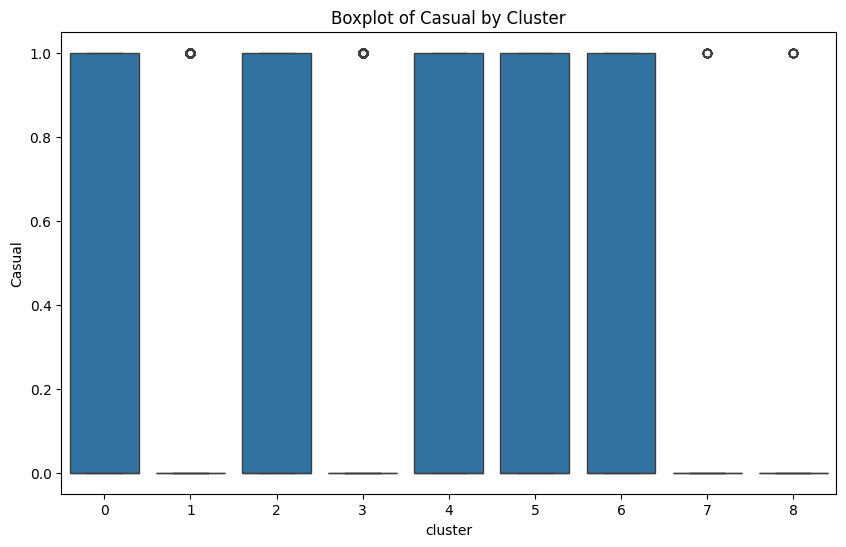

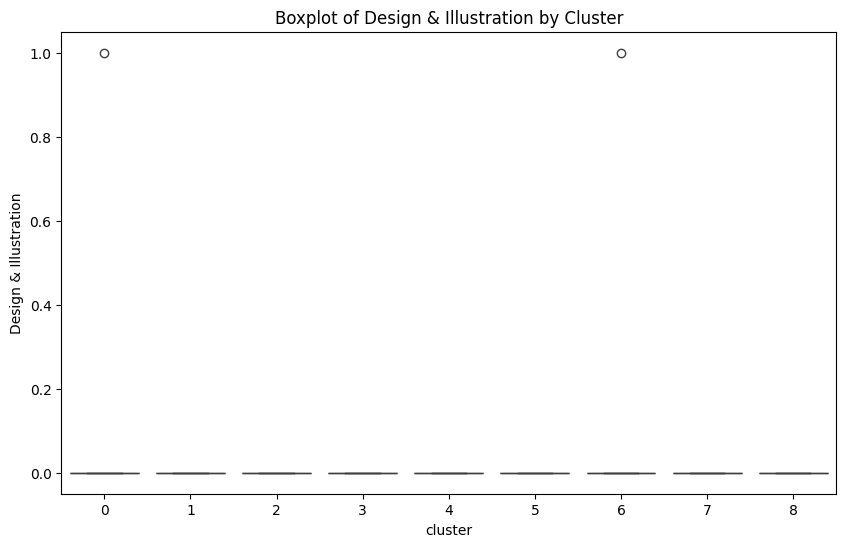

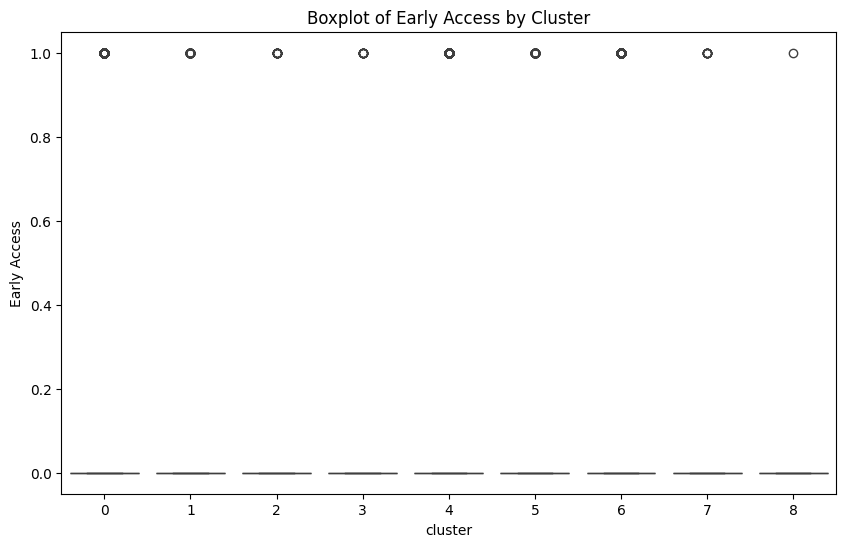

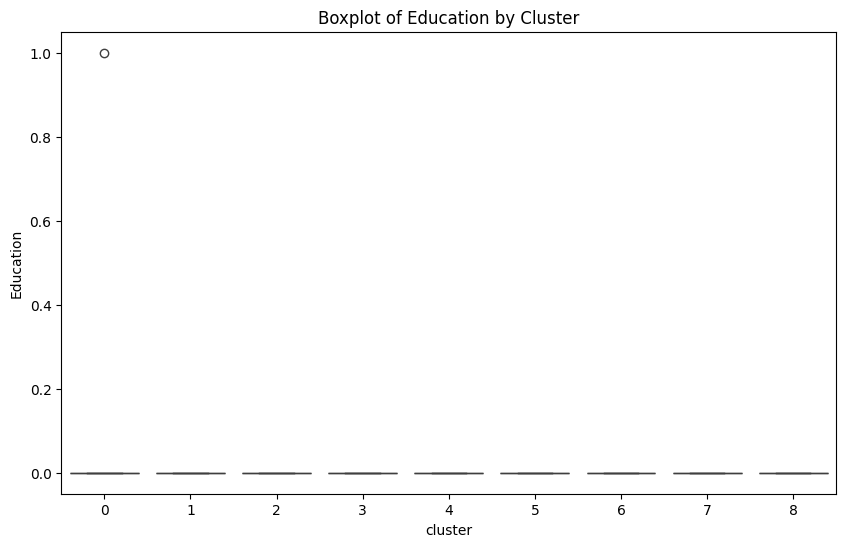

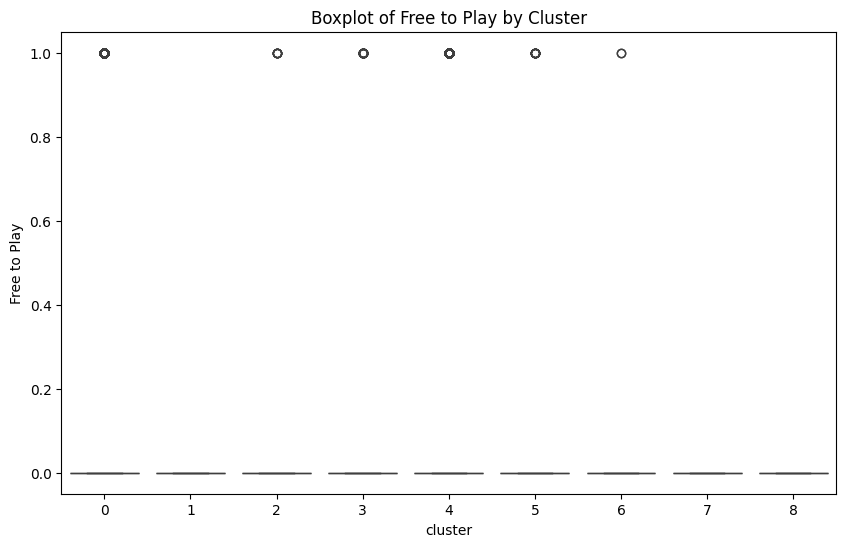

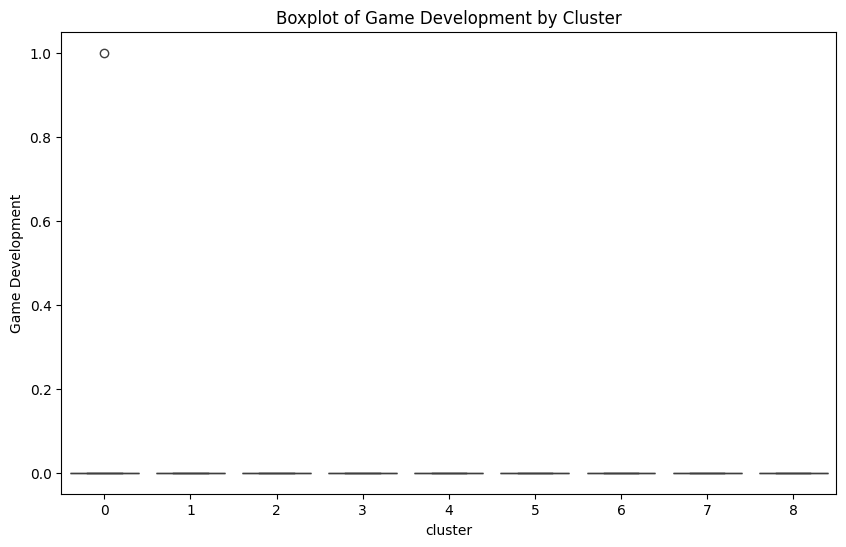

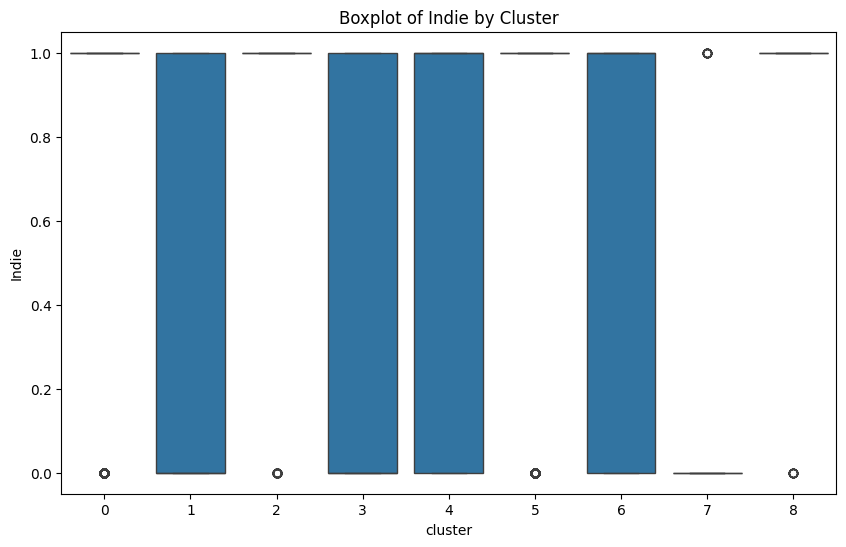

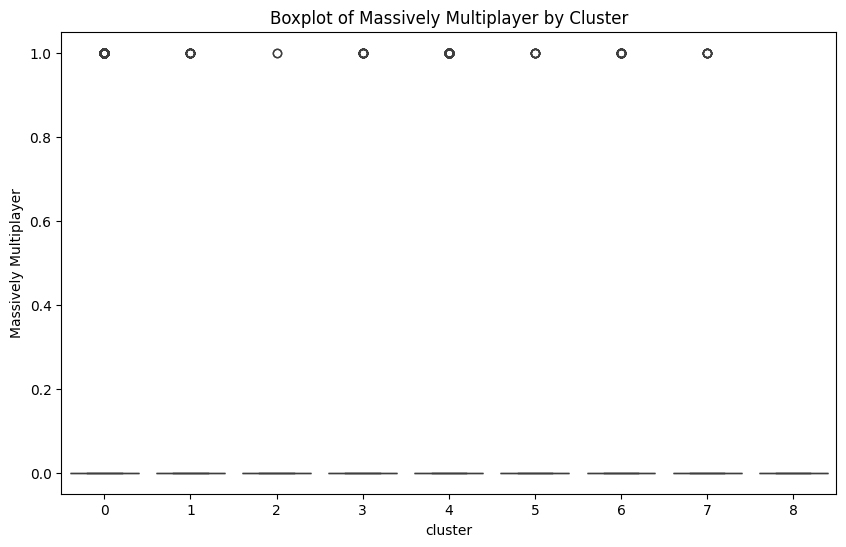

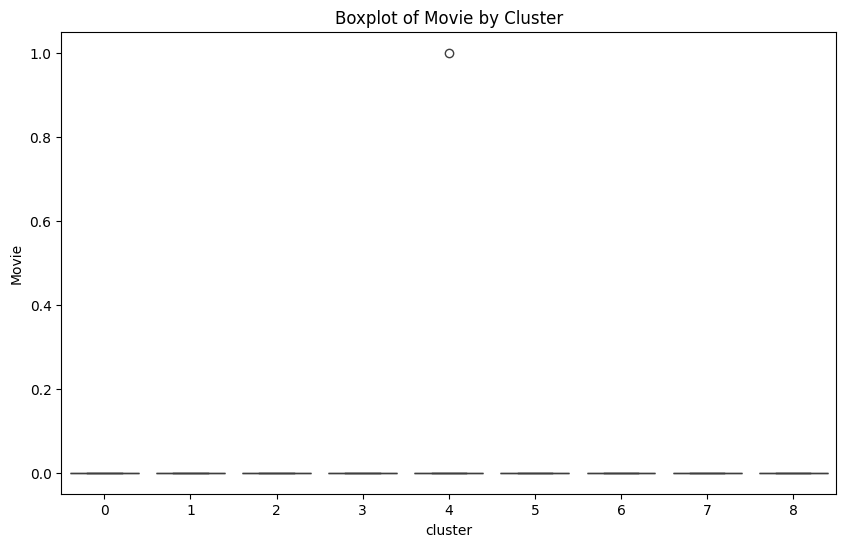

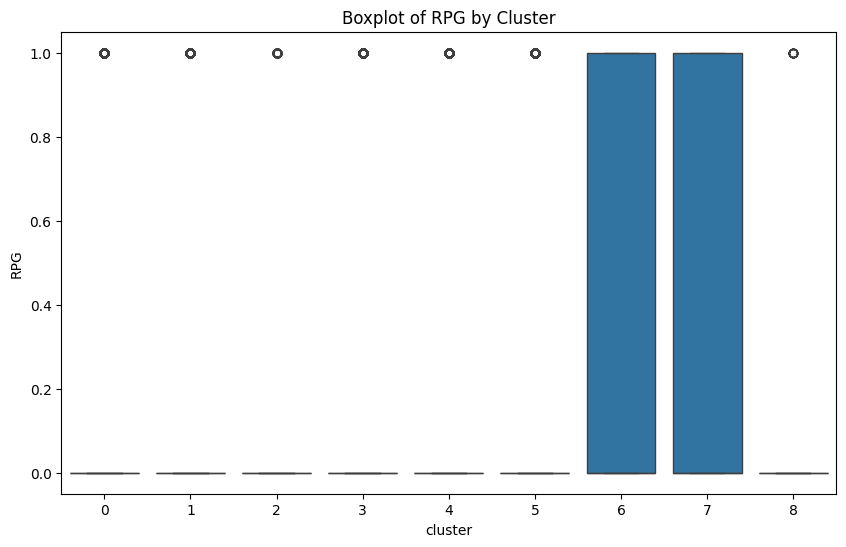

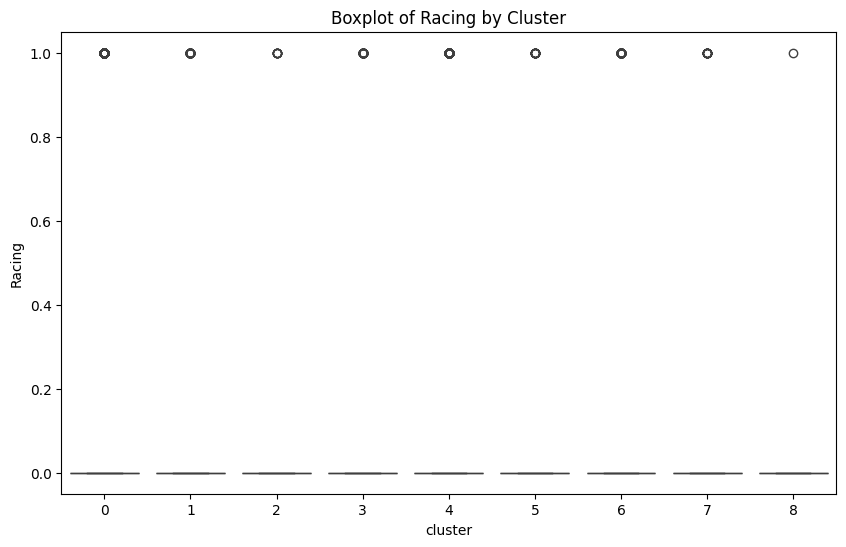

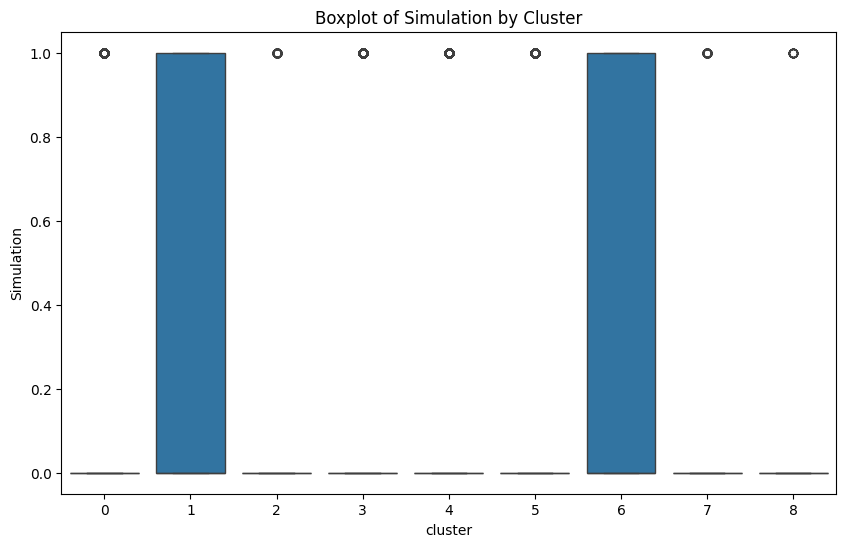

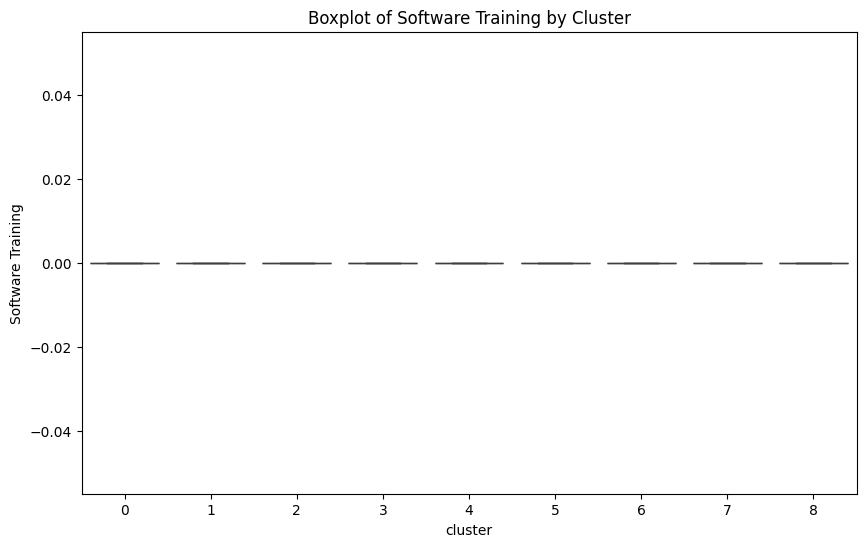

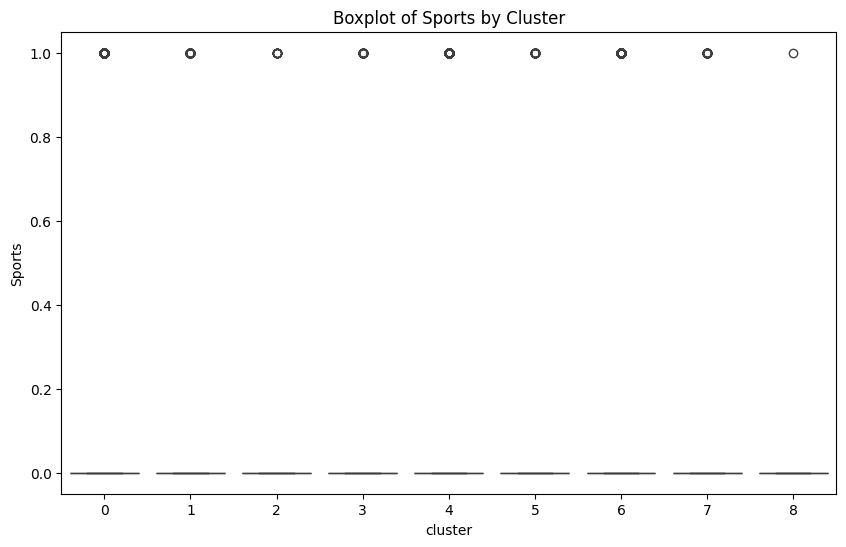

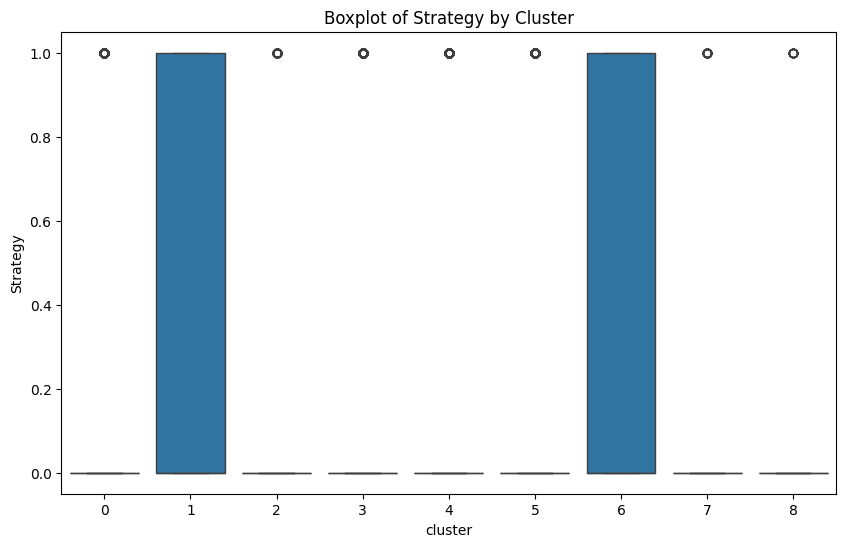

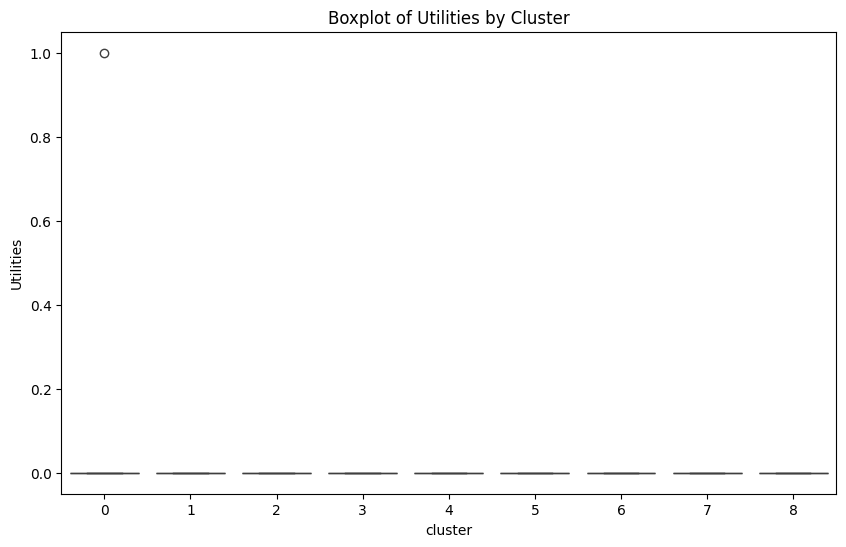

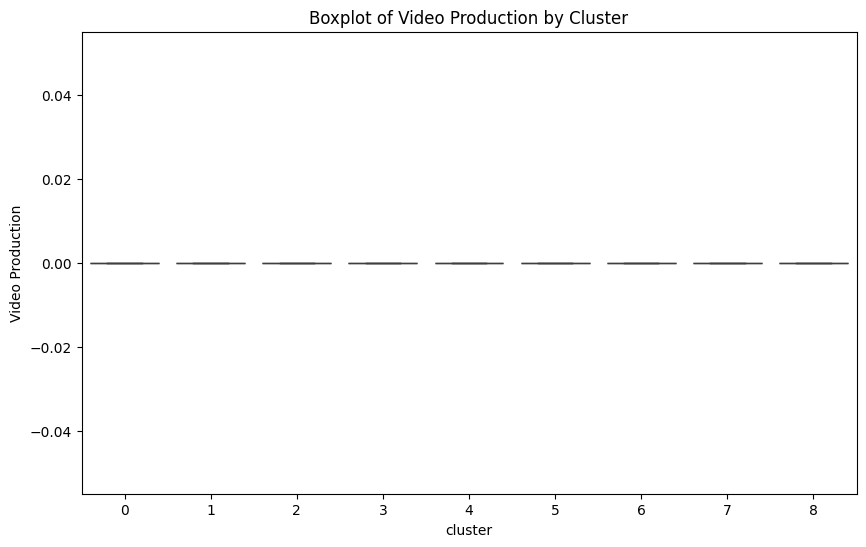

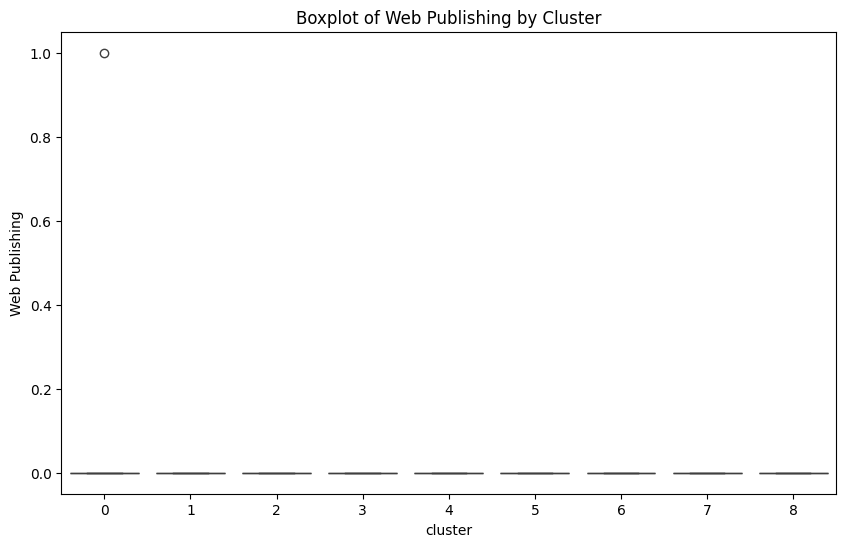

In [28]:
# box plots
for column in df.columns.drop(['Unnamed: 0', 'binary_class', 'cluster', 'padded_text']):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=column, data=df)
    plt.title(f'Boxplot of {column} by Cluster')
    plt.show()

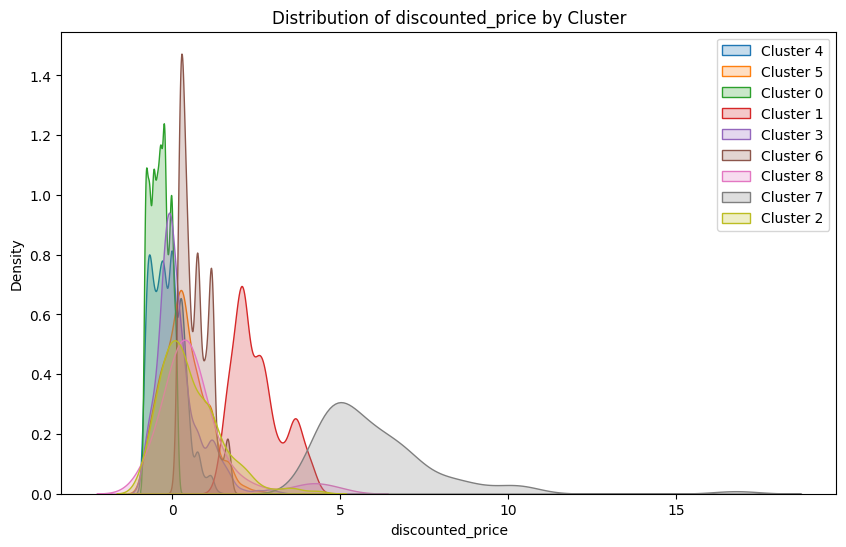

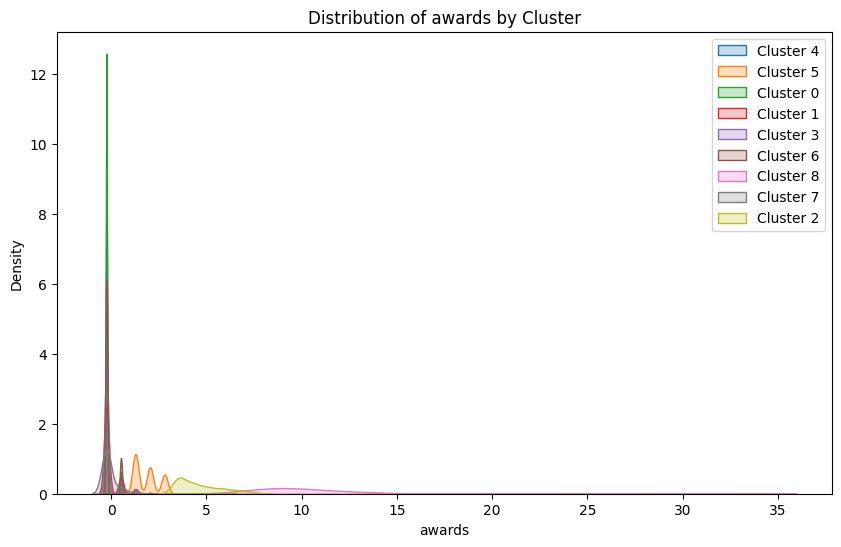

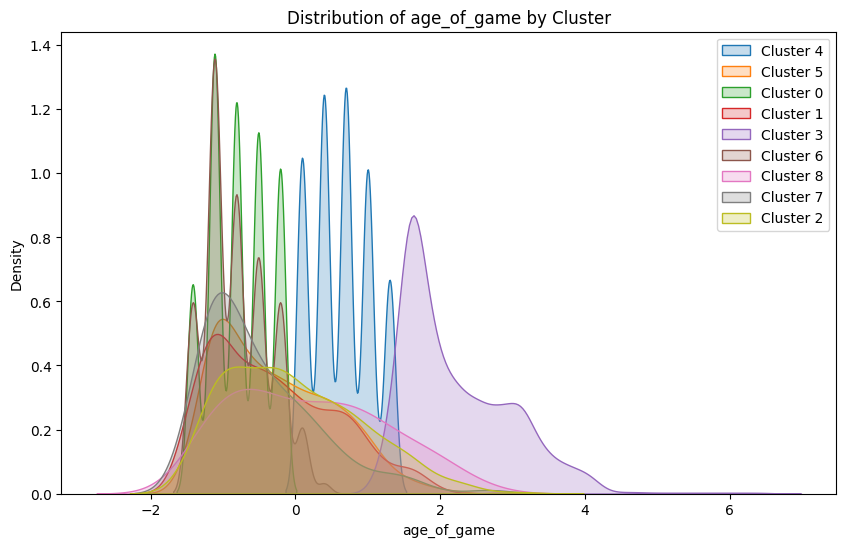

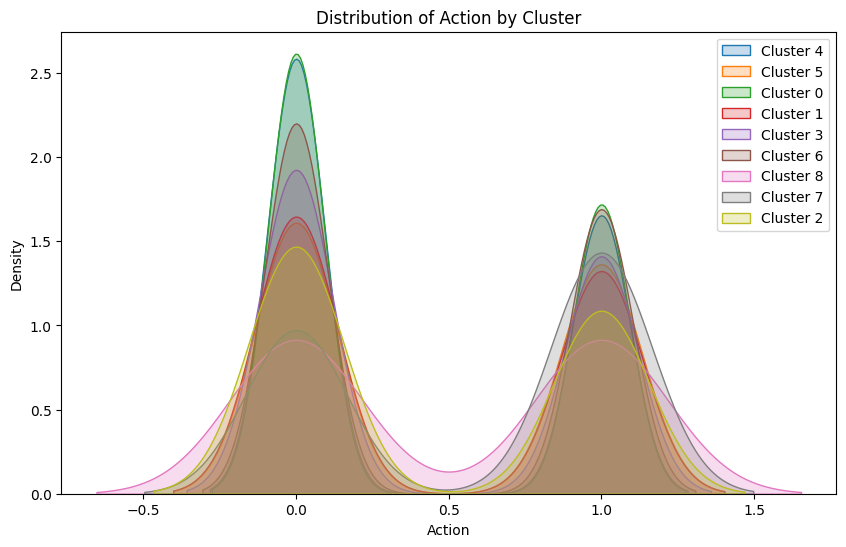

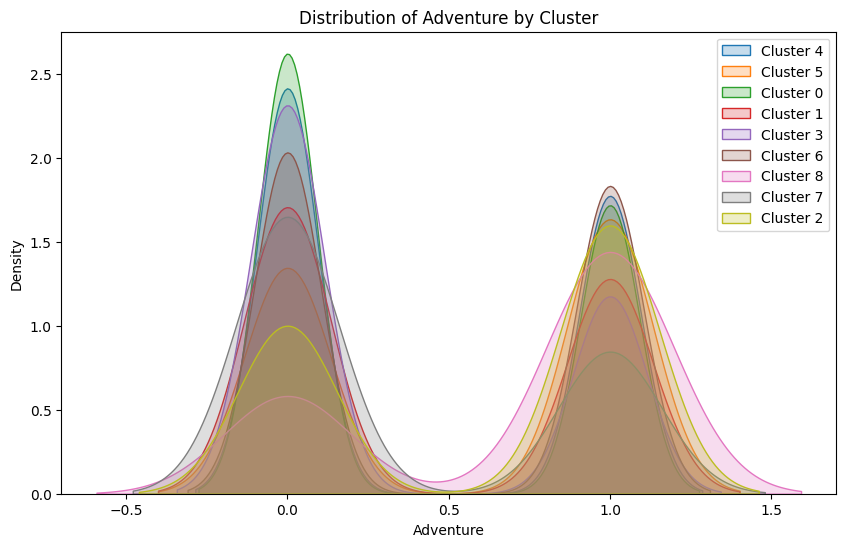

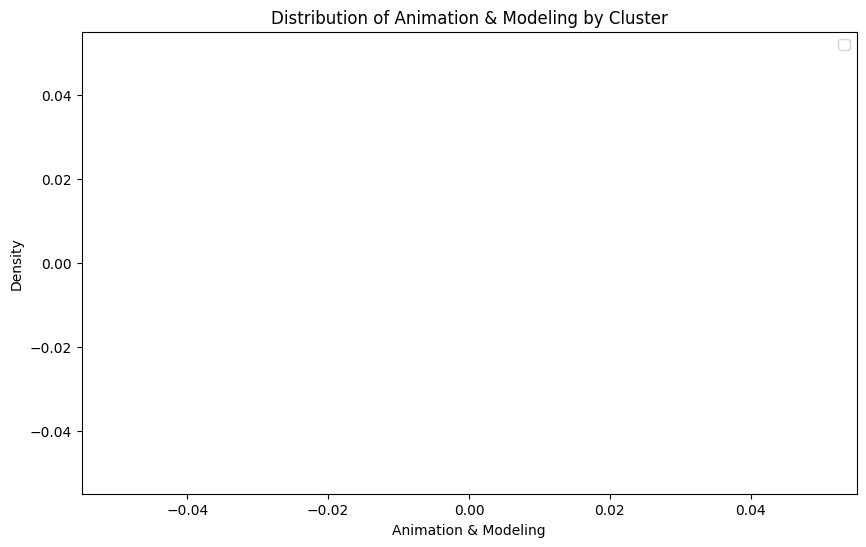

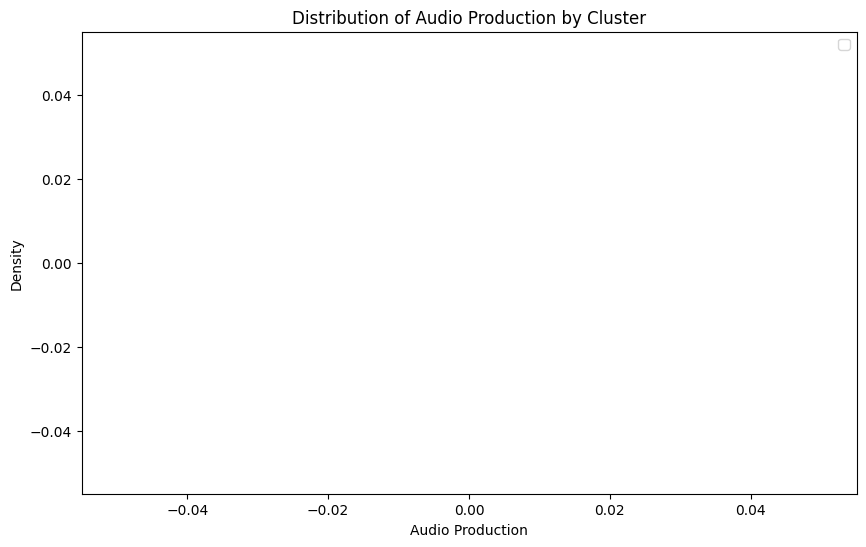

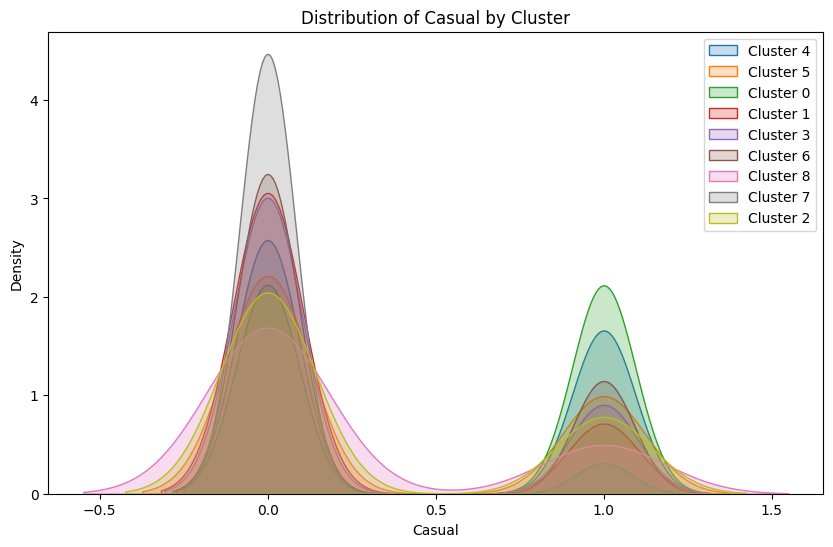

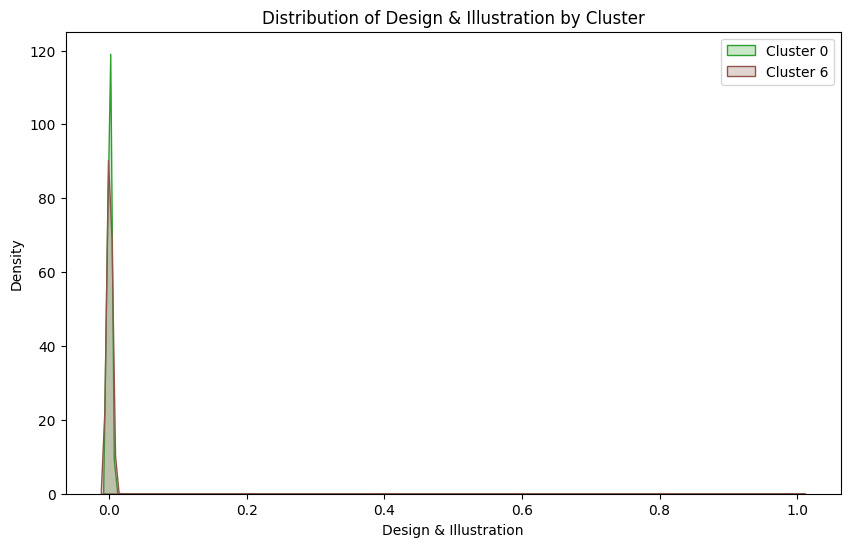

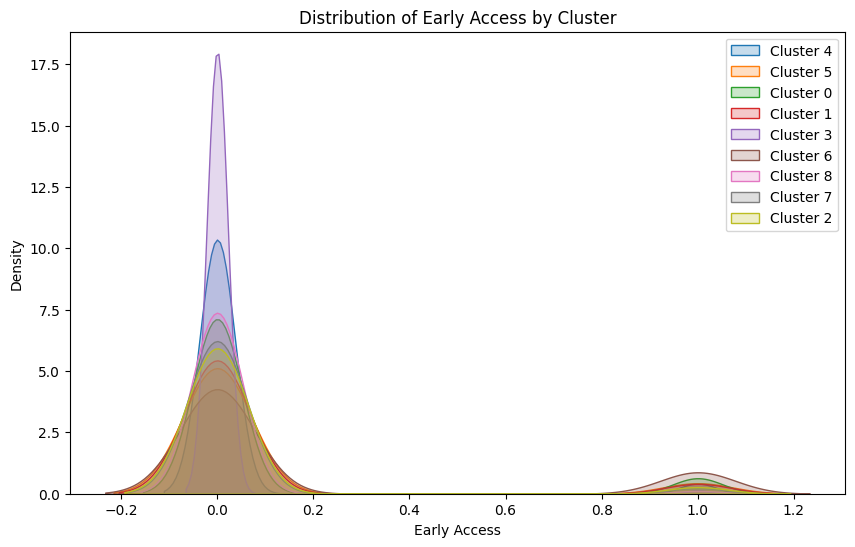

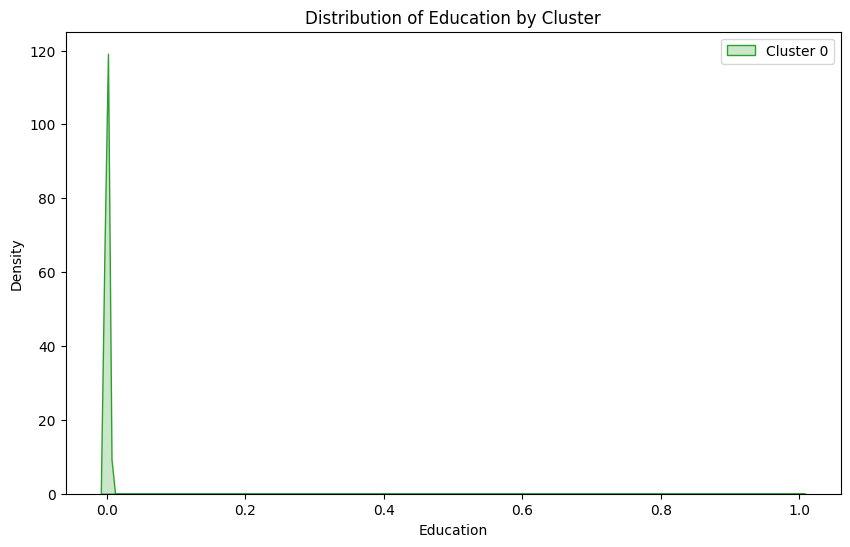

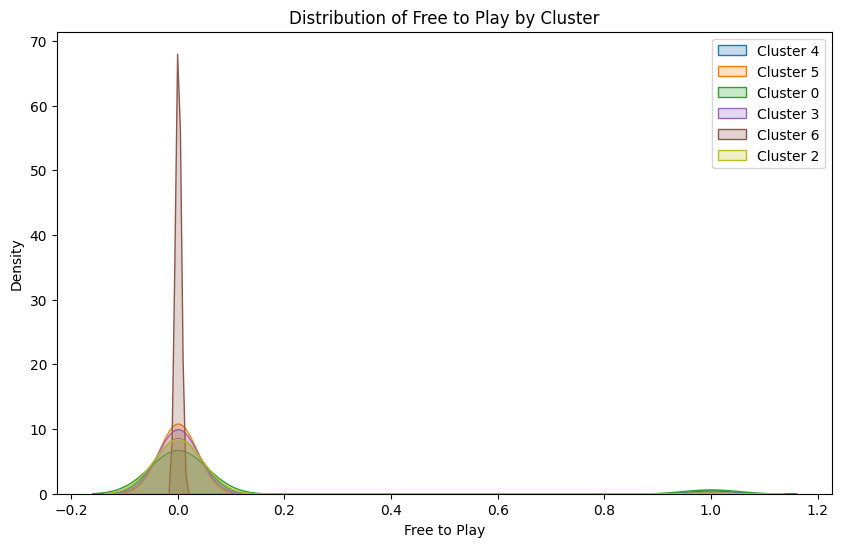

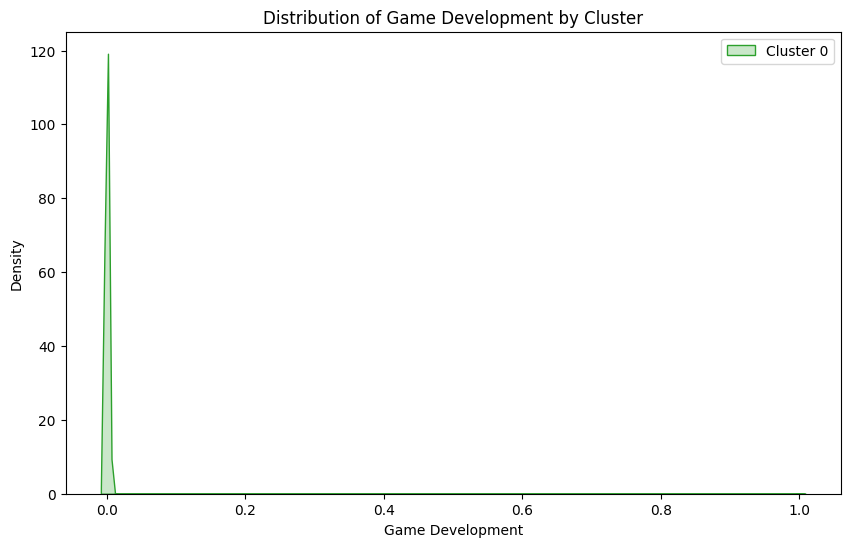

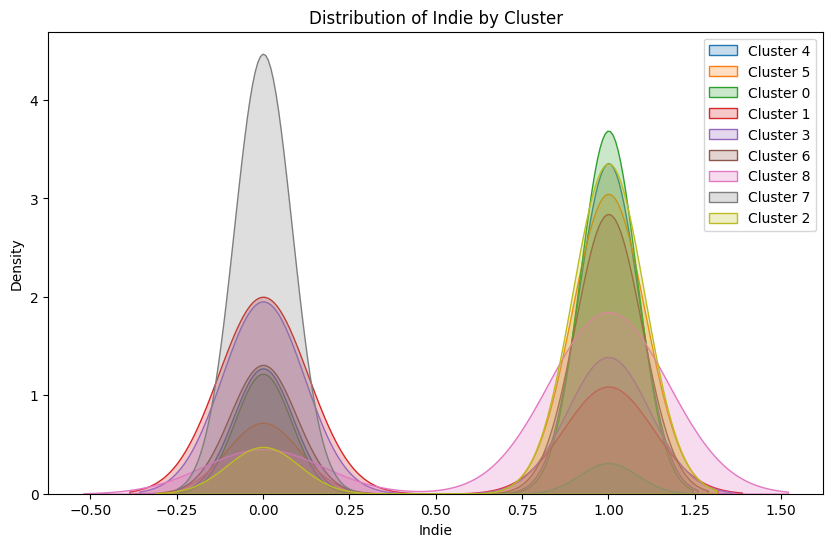

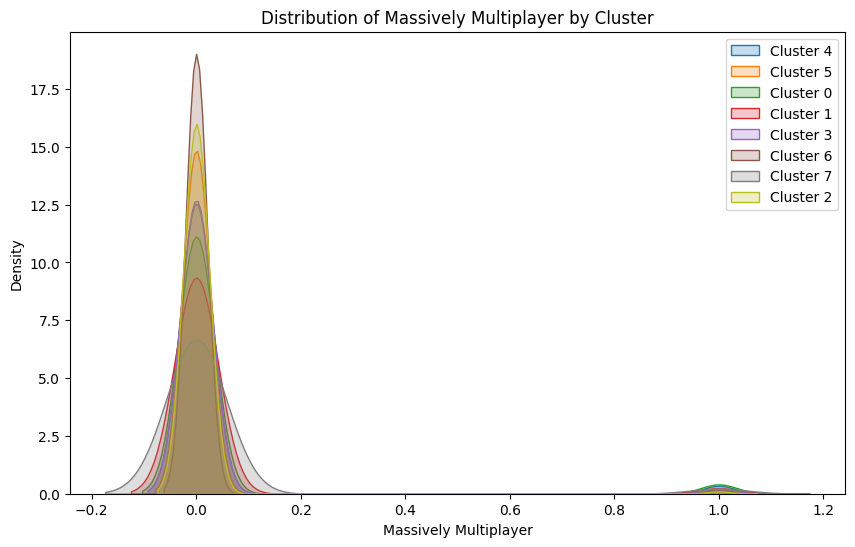

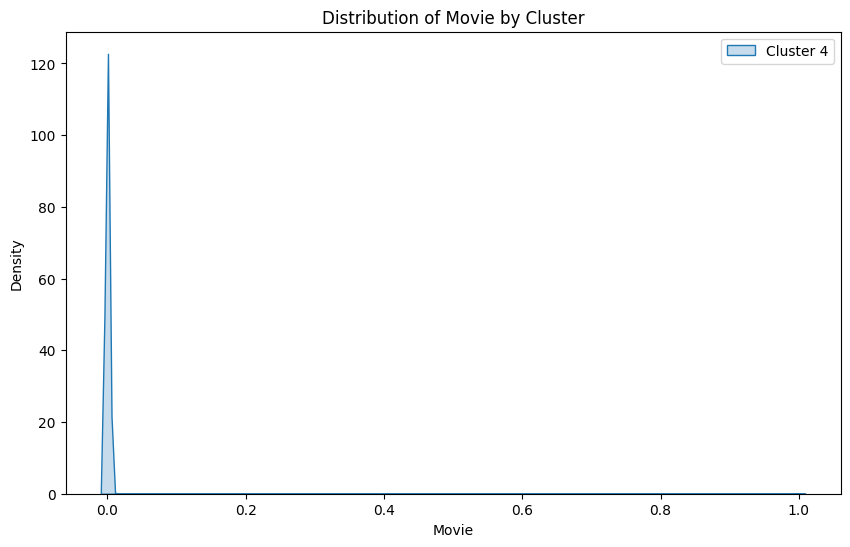

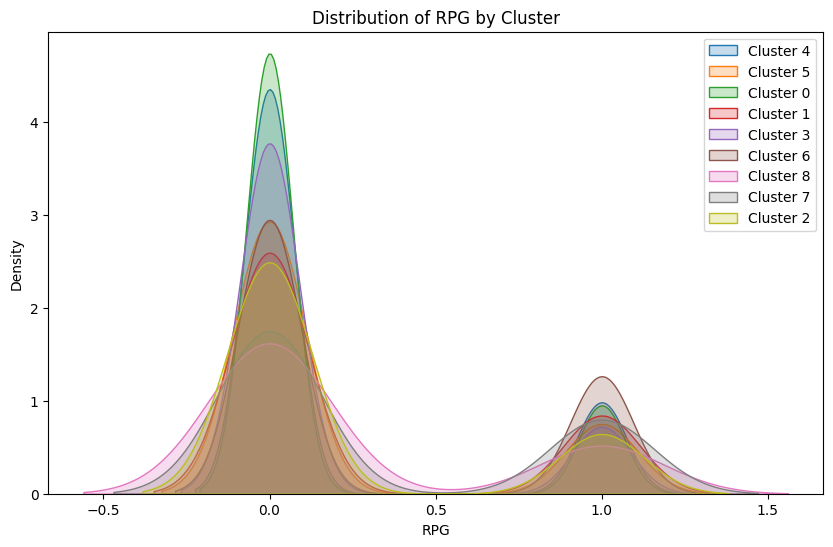

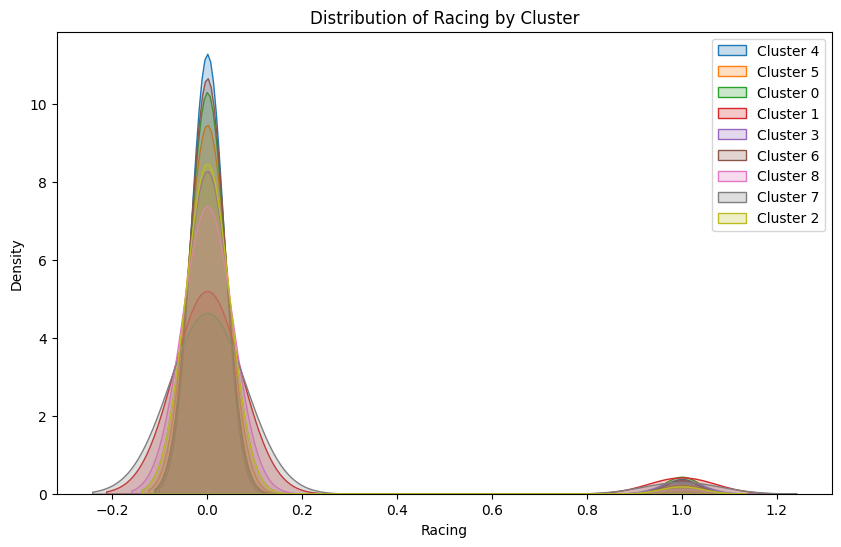

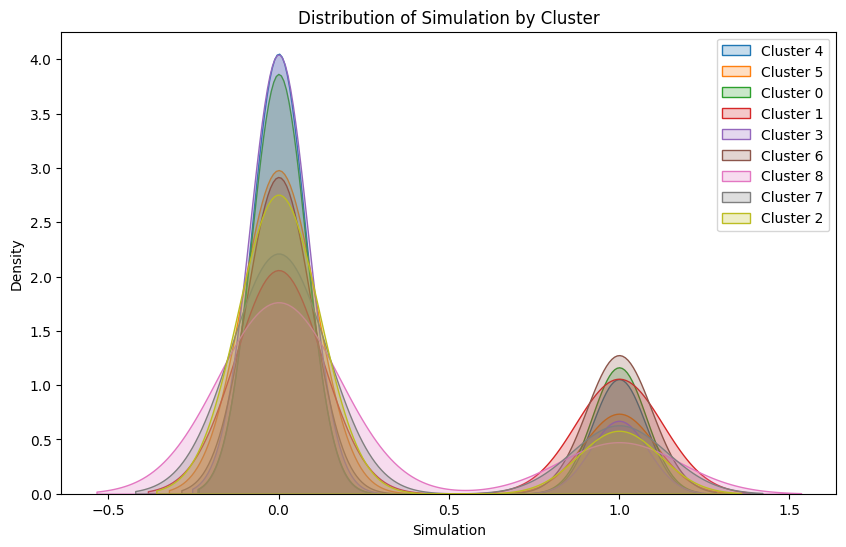

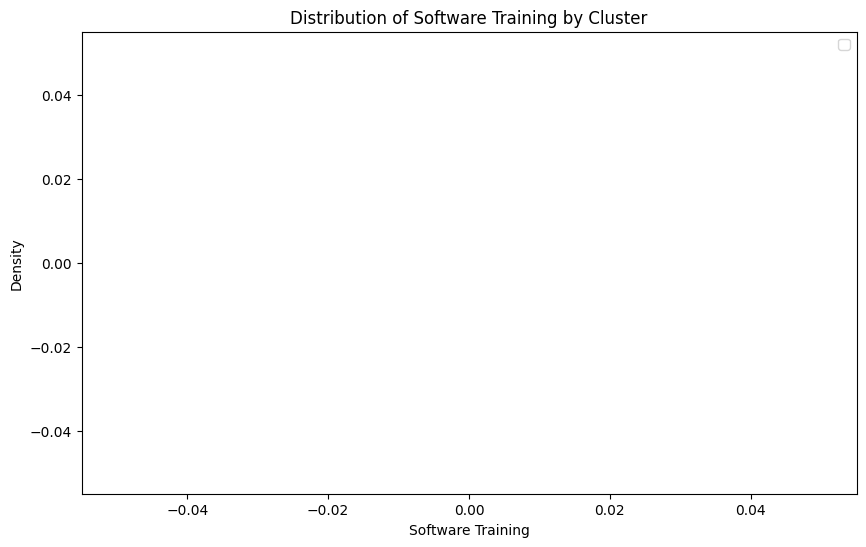

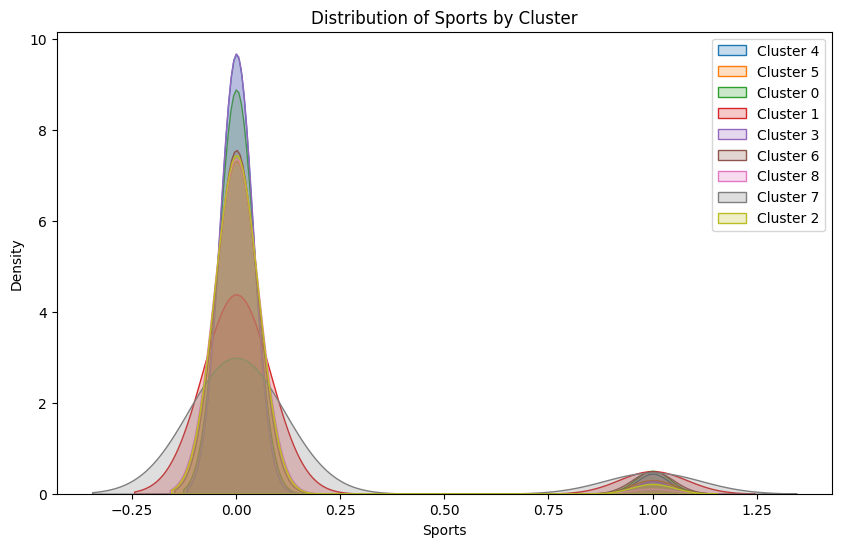

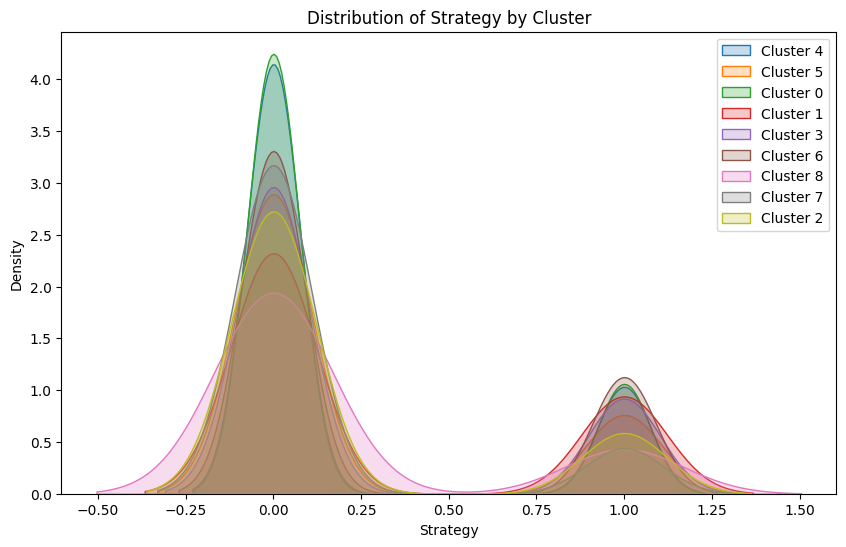

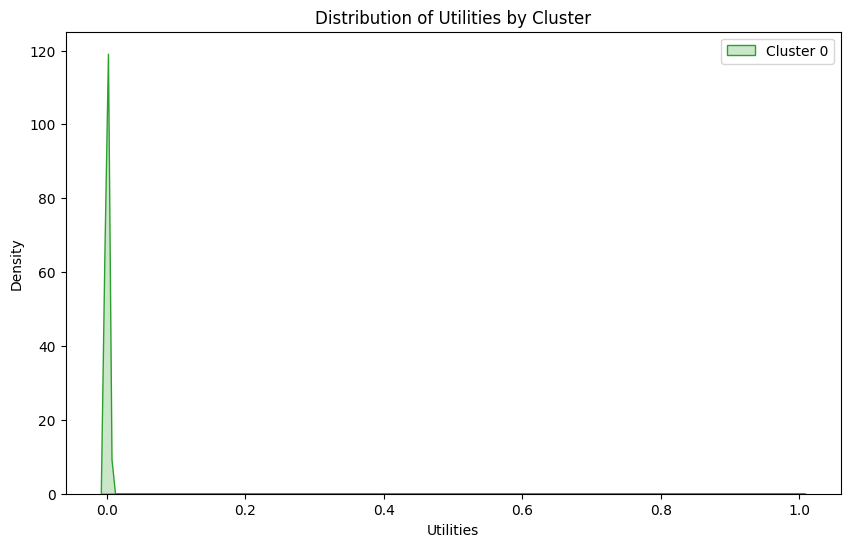

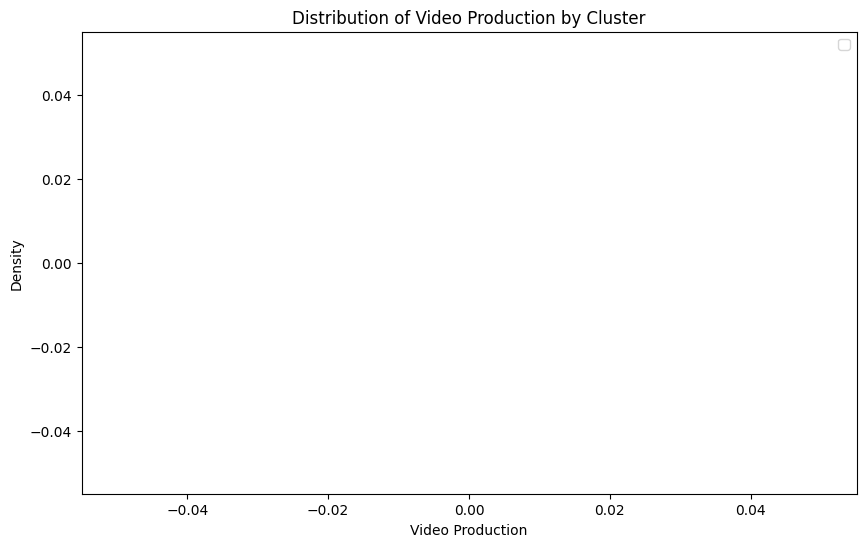

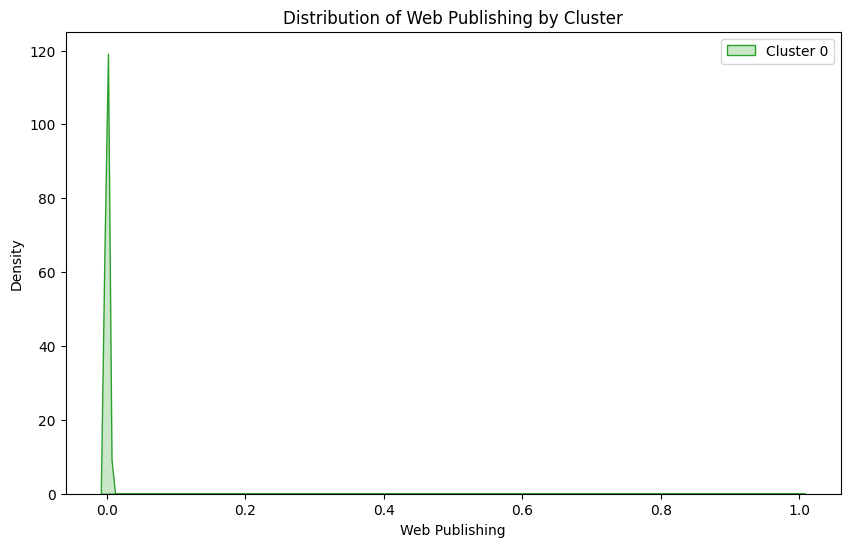

In [37]:
# distributions
for column in df.columns.drop(['Unnamed: 0', 'binary_class', 'cluster', 'padded_text']):
    plt.figure(figsize=(10, 6))
    for cluster in df['cluster'].unique():
        sns.kdeplot(df[df['cluster'] == cluster][column], label=f'Cluster {cluster}', fill=True, warn_singular=False)
    plt.title(f'Distribution of {column} by Cluster')
    plt.legend()
    plt.show()